Add IdentificationToolbox Package to Julia 

In [15]:
Pkg.update()

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [16]:
Pkg.rm("IdentificationToolbox")
Pkg.rm("ControlToolbox")
Pkg.rm("Slicot")
Pkg.clone("http://github.com/neveritt/ControlToolbox.jl")
Pkg.checkout("ControlToolbox","lsim")
Pkg.clone("http://github.com/neveritt/IdentificationToolbox.jl")
Pkg.clone("http://github.com/aytekinar/Slicot.jl")
Pkg.build("Slicot")
Pkg.add("Polynomials")
Pkg.add("ToeplitzMatrices")
Pkg.add("PyPlot")
Pkg.update()

INFO: Removing IdentificationToolbox (unregistered)
INFO: Removing ControlToolbox (unregistered)
INFO: Removing Slicot (unregistered)
INFO: Cloning ControlToolbox from http://github.com/neveritt/ControlToolbox.jl
INFO: Computing changes...
INFO: Cloning cache of DSP from git://github.com/JuliaDSP/DSP.jl.git
INFO: Installing DSP v0.1.1
INFO: Checking out ControlToolbox lsim...
INFO: Pulling ControlToolbox latest lsim...
INFO: Removing DSP v0.1.1
INFO: Cloning IdentificationToolbox from http://github.com/neveritt/IdentificationToolbox.jl
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Cloning Slicot from http://github.com/aytekinar/Slicot.jl
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Building Slicot
INFO: Attempting to Create directory /home/neveritt/.julia/v0.4/Slicot/deps/builds/libslicot
INFO: Changing Directory to /home/neveritt/.julia/v0.4/Slicot/deps/builds/libslicot


-- The Fortran compiler identification is GNU 6.1.1
-- Check for working Fortran compiler: /usr/bin/f95
-- Check for working Fortran compiler: /usr/bin/f95  -- works
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Checking whether /usr/bin/f95 supports Fortran 90
-- Checking whether /usr/bin/f95 supports Fortran 90 -- yes
-- ExtLibs: /usr/bin/../lib/julia/libopenblas.so
-- Building for Release
-- Configuring done
-- Generating done
-- Build files have been written to: /home/neveritt/.julia/v0.4/Slicot/deps/builds/libslicot
Scanning dependencies of target lapack_aux
[  0%] Building Fortran object src_aux/CMakeFiles/lapack_aux.dir/dcabs1.f.o
[  0%] Building Fortran object src_aux/CMakeFiles/lapack_aux.dir/dhgeqz.f.o
[  0%] Building Fortran object src_aux/CMakeFiles/lapack_aux.dir/dlagv2.f.o
[  0%] Building Fortran object src_aux/CMakeFiles/lapack_aux.dir/dtgsy2.f.o
[  0%] Linking Fortran static library liblapack_aux.a
[  0%] Built target lapack_aux

INFO: Nothing to be done
INFO: Nothing to be done
INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Updating Slicot...
INFO: Updating ControlToolbox...
INFO: Updating IdentificationToolbox...
INFO: Computing changes...
INFO: No packages to install, update or remove


Load the packages

In [17]:
using IdentificationToolbox
using ControlCore
using PyPlot

Define the true system

In [18]:
b = [0.1, 0.3, 0.2]
c = [0.5, 0.08]
d = [0.8, 0.1]
f = [0.5, 0.2, 0.1]
B = [0;b]
C = [1;c]
D = [1;d]
F = [1;f]
Ts = 0.1
nk = 1;

Create some data and save the data in an iddata object

In [19]:
N = 1000
u = randn(N)
lambda = 1
e = sqrt(lambda)*randn(N)
y = filt(B,F,u) + filt(C,D,e)
data = iddata(y,u,Ts)

Discrete-time data set with 1000 samples.
Sampling time: 0.1 seconds


Identify an arx model

In [20]:
na, nb = 5, 5
n = [na; nb; nk]
arx55 = arx(data,n)


mimo(nx=1x2 Array{Int64,2}:
 9  10,ny=1,nu=2,Ts=0.1)

Identify an armax model (initialized by iv4)

In [21]:
na, nb, nc = 3, 3, 3
n = [na; nb; nc; nk]
armax333 = armax(data,n)

mimo(nx=1x2 Array{Int64,2}:
 5  6,ny=1,nu=2,Ts=0.1)

BJ model (initialized at true parameters)

In [22]:
nb, nc, nd, nf = 3, 2, 2, 3
n = [nb; nc; nd; nf; nk]
bj3223 = pem(data, n, [b;c;d;f], BJ())

mimo(nx=1x2 Array{Int64,2}:
 5  4,ny=1,nu=2,Ts=0.1)

BJ model (initialized by MORMSM)

In [23]:
bj3223morsm = pem(data, n, BJ(), MORSM(version=:H))

mimo(nx=1x2 Array{Int64,2}:
 5  4,ny=1,nu=2,Ts=0.1)

compare identified models

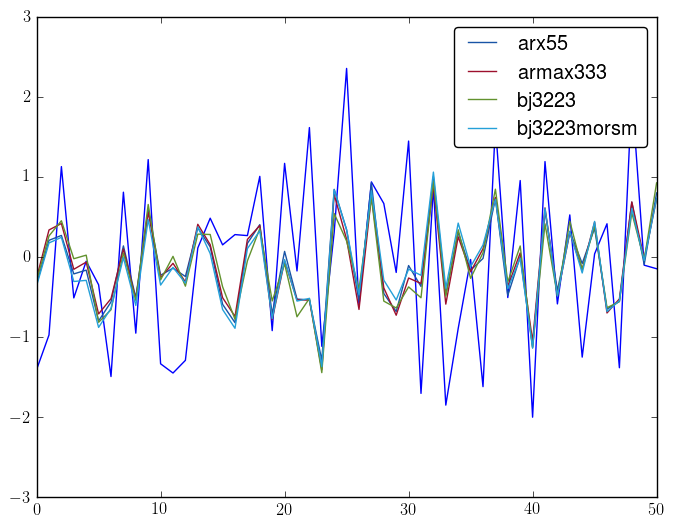

PyObject <matplotlib.legend.Legend object at 0x7fc318388d68>

In [24]:
yhat_arx55 = predict(data, arx55)
yhat_armax333 = predict(data, armax333)
yhat_bj3223 = predict(data, bj3223)
yhat_bj3223morsm = predict(data, bj3223morsm)

plot(data.y[950:1000],color="blue")
plot(yhat_arx55[950:1000],label="arx55")
plot(yhat_armax333[950:1000],label="armax333")
plot(yhat_bj3223[950:1000],label="bj3223")
plot(yhat_bj3223morsm[950:1000],label="bj3223morsm")
legend(loc="upper right",fancybox="true")

inspect model

In [12]:
fieldnames(bj3223)

8-element Array{Symbol,1}:
 :A   
 :B   
 :C   
 :D   
 :F   
 :G   
 :H   
 :info

In [13]:
bj3223.info.opt

Results of Optimization Algorithm
 * Algorithm: Newton's Method
 * Starting Point: [0.1,0.3, ...]
 * Minimizer: [0.10000108962229698,0.3000188593561042, ...]
 * Minimum: 9.363705e-01
 * Iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-16: false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 67
 * Gradient Calls: 67

In [14]:
poles(bj3223.G)

3-element Array{Complex{Float64},1}:
 5.23519e-5+0.447201im
 5.23519e-5-0.447201im
  -0.500006+0.0im     